In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta,datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('IIP_data.csv')

In [3]:
print(data.head())
print(len(data))

  Monthly Macro data  Unnamed: 1
0             Period  IIP (C-ND)
1             Apr-12        97.0
2             May-12        99.8
3             Jun-12       104.9
4             Jul-12       103.7
134


In [4]:
#remove empty value rows
data = data.dropna()
print(len(data))

128


In [5]:
print(data.columns)
data.rename(columns={'Monthly Macro data':'Period'}, inplace=True)
data.rename(columns={'Unnamed: 1':'Sales'}, inplace=True)
print(data.columns)

Index(['Monthly Macro data', 'Unnamed: 1'], dtype='object')
Index(['Period', 'Sales'], dtype='object')


In [6]:
print(data.head())

   Period       Sales
0  Period  IIP (C-ND)
1  Apr-12        97.0
2  May-12        99.8
3  Jun-12       104.9
4  Jul-12       103.7


In [7]:
#remove first row
data = data.iloc[1:]

In [8]:
print(data.head())

   Period  Sales
1  Apr-12   97.0
2  May-12   99.8
3  Jun-12  104.9
4  Jul-12  103.7
5  Aug-12  103.8


In [9]:
#convert Period column to datetime
data['Period'] = pd.to_datetime(data['Period'], format='%b-%y')

In [10]:
print(data.head())

      Period  Sales
1 2012-04-01   97.0
2 2012-05-01   99.8
3 2012-06-01  104.9
4 2012-07-01  103.7
5 2012-08-01  103.8


EDA


In [11]:
print(data.head())

      Period  Sales
1 2012-04-01   97.0
2 2012-05-01   99.8
3 2012-06-01  104.9
4 2012-07-01  103.7
5 2012-08-01  103.8


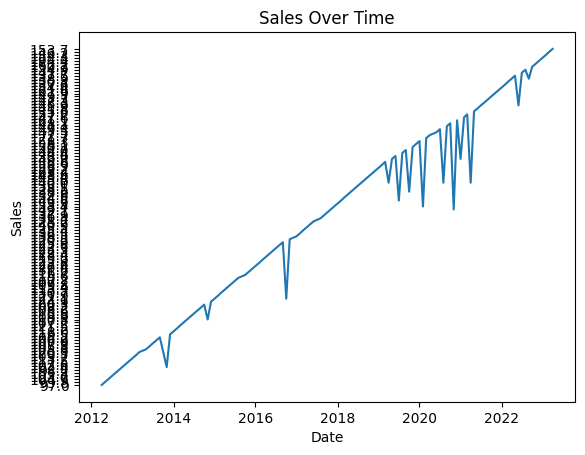

In [12]:
plt.plot(data['Period'],data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [13]:
print(data.head())

      Period  Sales
1 2012-04-01   97.0
2 2012-05-01   99.8
3 2012-06-01  104.9
4 2012-07-01  103.7
5 2012-08-01  103.8


In [14]:
#checking for stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.076873831944991
p-value: 0.7242057021731961


We can see from the p-value that the time series is not stationary.

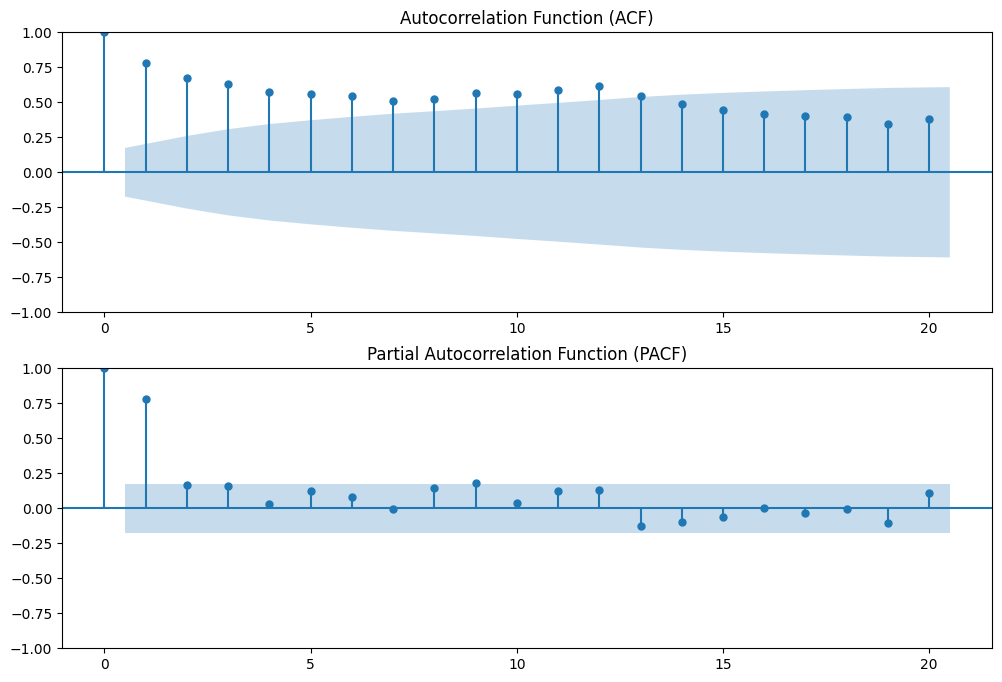

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(data['Sales'], lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(data['Sales'], lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [26]:
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')

p, d, q = 2, 1, 13

model = ARIMA(data['Sales'], order=(p, d, q))
results = model.fit()

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [27]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  127
Model:                ARIMA(2, 1, 13)   Log Likelihood                -470.873
Date:                Fri, 08 Mar 2024   AIC                            973.746
Time:                        14:31:10   BIC                           1019.126
Sample:                             0   HQIC                           992.183
                                - 127                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0508      2.151     -0.024      0.981      -4.267       4.165
ar.L2          0.6875      1.944      0.354      0.724      -3.124       4.499
ma.L1         -0.4498      2.171     -0.207      0.8

In [35]:
r1 = (-0.0508/2.151)
print(r1)

-0.023616922361692237


In [28]:
forecast_steps = 5
forecast = results.get_forecast(steps=forecast_steps)
print(forecast.summary_frame())

Sales        mean    mean_se  mean_ci_lower  mean_ci_upper
127    155.538196  10.024552     135.890435     175.185957
128    147.703989  11.204968     125.742655     169.665324
129    146.091745  11.432474     123.684508     168.498983
130    142.960290  11.596941     120.230703     165.689877
131    144.877247  11.620129     122.102213     167.652280


/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [29]:
forecast_values = results.get_forecast(steps=forecast_steps).predicted_mean
print(forecast_values)

127    155.538196
128    147.703989
129    146.091745
130    142.960290
131    144.877247
Name: predicted_mean, dtype: float64


/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/ojasvasingh/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [30]:
start_date = datetime(2023, 5, 1)


date_range = pd.date_range(start_date, periods=5, freq='MS')
val_range = pd.Series(forecast_values)
# Create a DataFrame with the new date range
new_data = pd.DataFrame({'Period': date_range, 'Sales': val_range})

# Display the new DataFrame
print(new_data)

        Period       Sales
127 2023-05-01  155.538196
128 2023-06-01  147.703989
129 2023-07-01  146.091745
130 2023-08-01  142.960290
131 2023-09-01  144.877247


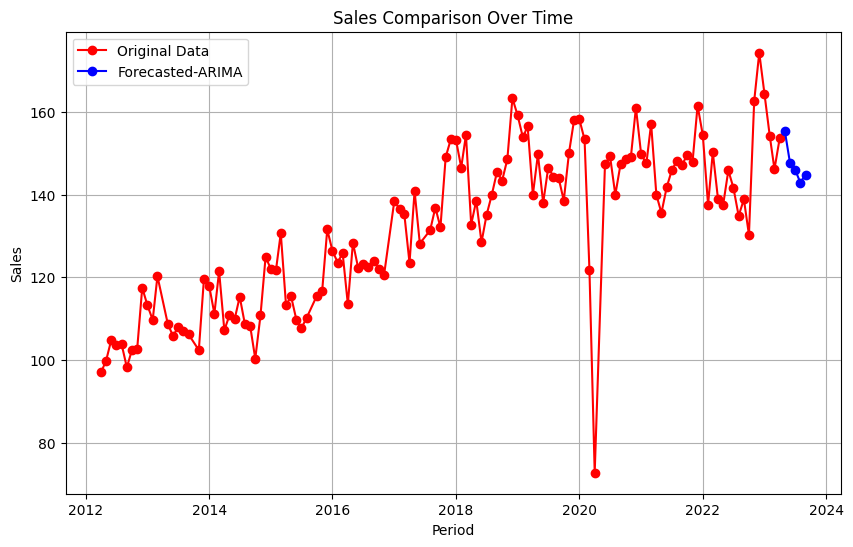

In [31]:
plt.figure(figsize=(10, 6))

plt.plot(data['Period'], data['Sales'], label='Original Data', color='red', marker='o')
plt.plot(new_data['Period'], new_data['Sales'], label='Forecasted-ARIMA', color='blue', marker='o')

plt.title('Sales Comparison Over Time')
plt.xlabel('Period')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
import plotly.express as px


In [33]:
fig = px.line(title='Sales Comparison Over Time')

fig.add_trace(px.scatter(data, x='Period', y='Sales', color_discrete_sequence=['red']).data[0])
fig.add_trace(px.scatter(new_data, x='Period', y='Sales', color_discrete_sequence=['blue']).data[0])

fig.show()